In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [108]:
dataset = pd.read_csv("adult.csv")

In [109]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [110]:
dataset.duplicated().sum()

24

In [111]:
dataset = dataset.drop_duplicates()
dataset.shape

(32537, 15)

In [112]:
features = dataset.select_dtypes(include=['object']).columns
features

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'country', 'salary'],
      dtype='object')

In [113]:
dataset.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [114]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [115]:
dataset.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [118]:
print((dataset['salary'] == ' >50K'))

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557     True
32558    False
32559    False
32560     True
Name: salary, Length: 32537, dtype: bool


In [129]:
print(f"above 50k ratio: {(dataset['salary'] == ' >50K').astype('int').sum() / dataset.shape[0] * 100 :.2f}%")

above 50k ratio: 24.09%


In [130]:
num_f = dataset.select_dtypes(include=['int64']).columns


<Figure size 1152x720 with 0 Axes>

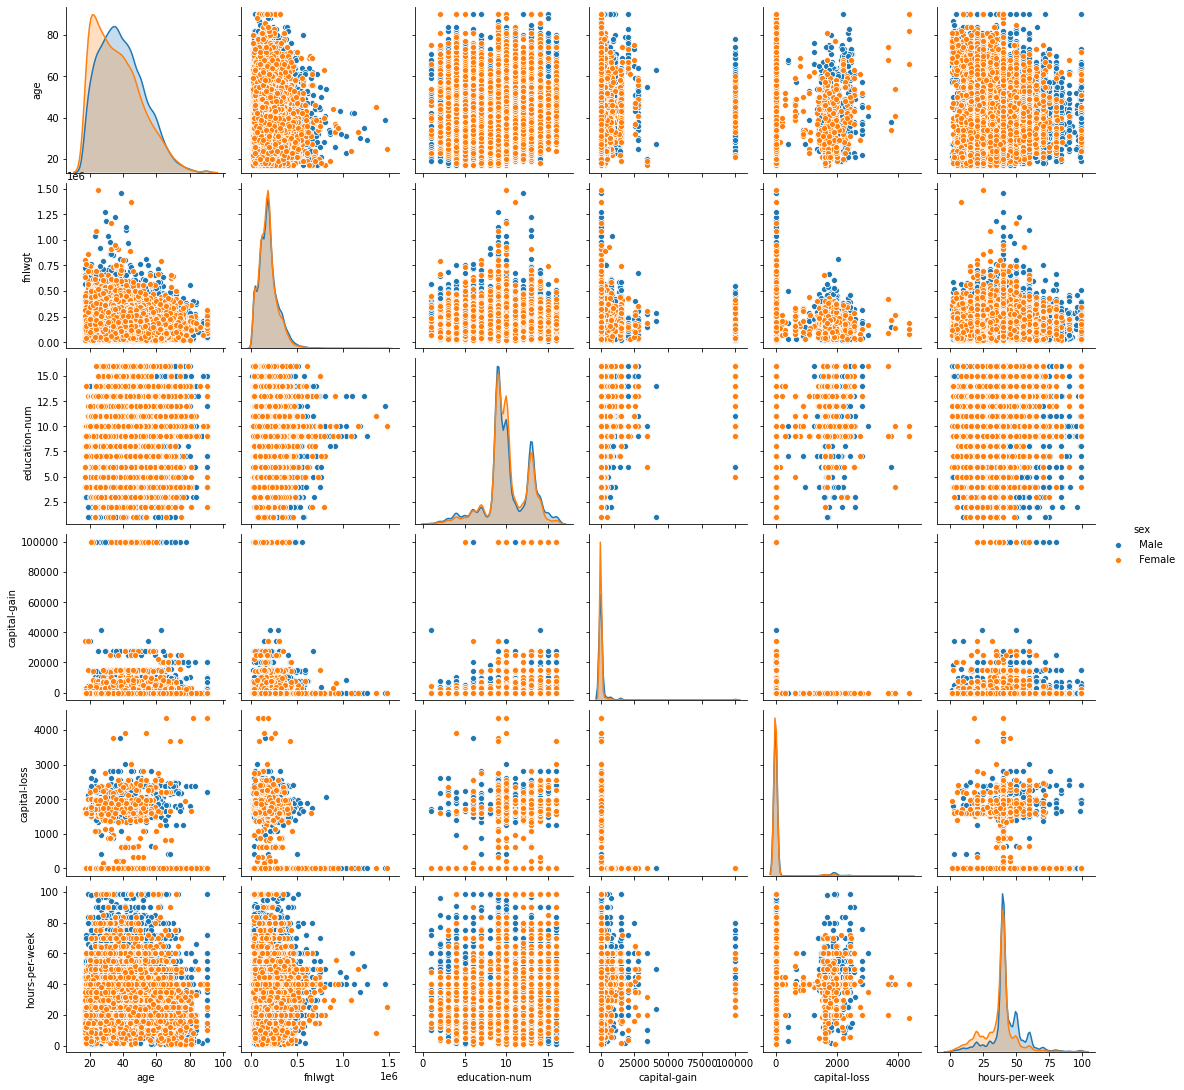

In [138]:
import seaborn as sns

plt.figure(1, figsize=(16,10))
sns.pairplot(data=dataset, hue='sex')
plt.show()

In [141]:
nb_female = (dataset.sex == ' Female').astype('int').sum()
nb_male = (dataset.sex == ' Male').astype('int').sum()
nb_female, nb_male

(10762, 21775)

In [144]:
# nb of people earning more or less than 50k per gender
nb_male_above = len(dataset[(dataset.salary == ' >50K') & (dataset.sex == ' Male')])
nb_male_below = len(dataset[(dataset.salary == ' <=50K') & (dataset.sex == ' Male')])
nb_female_above = len(dataset[(dataset.salary == ' >50K') & (dataset.sex == ' Female')])
nb_female_below = len(dataset[(dataset.salary == ' <=50K') & (dataset.sex == ' Female')])
nb_male_above, nb_male_below, nb_female_above, nb_female_below

(6660, 15115, 1179, 9583)

In [145]:
print(f'Among Males   : {nb_male_above/nb_male*100:.0f}% earn >50K // {nb_male_below/nb_male*100:.0f}% earn <=50K')
print(f'Among Females : {nb_female_above/nb_female*100:.0f}% earn >50K // {nb_female_below/nb_female*100:.0f}% earn <=50K')

Among Males   : 31% earn >50K // 69% earn <=50K
Among Females : 11% earn >50K // 89% earn <=50K


In [146]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [147]:
# Training dataset

In [149]:
dataset['salary'] = pd.get_dummies(dataset['salary'], prefix='salary', drop_first=True)


In [150]:
y = dataset.salary
dataset = dataset.drop(columns=['salary'])

In [151]:
dataset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [153]:
print(f'Above 50k ratio (taking avr):  {y.sum()/len(y)*100:.2f}%')


Above 50k ratio (taking avr):  24.09%


In [154]:
cols = list(dataset.columns)
cols

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'country']

In [157]:
feature = dataset.select_dtypes(include=['object']).columns
X = pd.get_dummies(dataset[feature], drop_first=True)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


NameError: name 'train_test_split' is not defined

In [159]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [161]:
# Prediction:

In [162]:
def accuracy(model, name):
    model.fit(X_train, y_train)
    print('Accuracy of the', name, f': on train = {model.score(X_train, y_train)*100:.2f}%, on test = {model.score(X_test, y_test)*100:.2f}%')

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

accuracy(LogisticRegression(), 'LogisticReg')

Accuracy of the LogisticReg : on train = 83.18%, on test = 83.21%


c:\users\acer\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [165]:
# Evaluate decision tree
from sklearn.tree import DecisionTreeRegressor
decisionTree_model = DecisionTreeRegressor()
decisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [167]:
accuracy_decisionTree = decisionTree_model.score(X_test, y_test)
accuracy_decisionTree

0.1962513029256051

In [171]:
accuracy(DecisionTreeClassifier(), 'DecisionTreeClassifier')

Accuracy of the DecisionTreeClassifier : on train = 86.94%, on test = 81.01%


In [ ]:
#linear Regression

In [173]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
reg = LinearRegression()
reg.fit(X_train,y_train)
accuracy = reg.score(X_test,y_test)
accuracy

0.3258030976508629

In [174]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [183]:
ANN = keras.Sequential()
ANN.add(Dense(50, input_dim = 7))
ANN.add(Activation('relu'))
ANN.add(Dense(150))
ANN.add(Activation('relu'))
ANN.add(Dropout(0.5))
ANN.add(Dense(150))
ANN.add(Activation('relu'))
ANN.add(Dropout(0.5))
ANN.add(Dense(50))
ANN.add(Activation('linear'))
ANN.add(Dense(1))
ANN.compile(loss = 'mse', optimizer = 'adam')
ANN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 50)                400       
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_5 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_6 (Activation)    (None, 150)              